<a href="https://colab.research.google.com/github/nn043930-jpg/image-colorization/blob/main/Another_copy_of_intershipproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade torch torchvision torchaudio

In [ ]:
import torch
print("Torch version:",torch.__version__)
print("CUDA available:",torch.cuda.is_available())
print("GPU name:",torch.cuda.get_device_name(0))

Torch version: 2.10.0+cu128
CUDA available: True
GPU name: Tesla T4


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

print("Torch:", torch. __version__)
print("Torchvision:", torchvision. __version__)
print("CUDA:", torch.cuda.is_available())


Torch: 2.10.0+cu128
Torchvision: 0.25.0+cu128
CUDA: True


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
  print(torch.cuda.current_device())
  print(torch.cuda.device(0))
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name(0))
else:
  print("No NVIDIA driver found. Using CPU")


0
1
Tesla T4


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=2
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=2
)

100%|██████████| 170M/170M [00:05<00:00, 30.8MB/s]


In [ ]:
class ColorizationNet(nn.Module):
     def __init__(self):
          super(ColorizationNet,self).__init__()
          self.conv1 = nn.Conv2d(1, 64, kernel_size=5, stride=1, padding=4,
dilation=2)
          self.conv2 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=4,
dilation=2)
          self.conv3 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=4,
dilation=2)
          self.conv4 = nn.Conv2d(128, 3, kernel_size=5, stride=1, padding=4,
dilation=2)
     def forward(self, x):
          x=nn.functional.relu(self.conv1(x))
          x=nn.functional.relu(self.conv2(x))
          x=nn.functional.relu(self.conv3(x))
          x=torch.sigmoid(self.conv4(x))
          return x

In [ ]:
Model= ColorizationNet().to(device)
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(Model.parameters(), lr=0.001)
# Convert RGB image to grayscale
def rgb_to_gray(img):
    return img.mean(dim=1, keepdim=True)

In [ ]:
EPOCHS = 30

for epoch in range(EPOCHS):
    for i, (images, _)in enumerate(train_loader):

        grayscale_images = rgb_to_gray(images).to(device)
        images = images.to(device)

        outputs = Model(grayscale_images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{EPOCHS}], "
                f"Step [{i+1}/{len(train_loader)}], "
                f"Loss: {loss.item():.4f}"
            )

print("Finished Training")


Epoch [1/30], Step [1/782], Loss: 0.0592
Epoch [1/30], Step [101/782], Loss: 0.0084
Epoch [1/30], Step [201/782], Loss: 0.0079
Epoch [1/30], Step [301/782], Loss: 0.0060
Epoch [1/30], Step [401/782], Loss: 0.0046
Epoch [1/30], Step [501/782], Loss: 0.0071
Epoch [1/30], Step [601/782], Loss: 0.0044
Epoch [1/30], Step [701/782], Loss: 0.0046
Epoch [2/30], Step [1/782], Loss: 0.0066
Epoch [2/30], Step [101/782], Loss: 0.0051
Epoch [2/30], Step [201/782], Loss: 0.0060
Epoch [2/30], Step [301/782], Loss: 0.0043
Epoch [2/30], Step [401/782], Loss: 0.0048
Epoch [2/30], Step [501/782], Loss: 0.0064
Epoch [2/30], Step [601/782], Loss: 0.0064
Epoch [2/30], Step [701/782], Loss: 0.0051
Epoch [3/30], Step [1/782], Loss: 0.0057
Epoch [3/30], Step [101/782], Loss: 0.0060
Epoch [3/30], Step [201/782], Loss: 0.0045
Epoch [3/30], Step [301/782], Loss: 0.0047
Epoch [3/30], Step [401/782], Loss: 0.0057
Epoch [3/30], Step [501/782], Loss: 0.0056
Epoch [3/30], Step [601/782], Loss: 0.0047
Epoch [3/30], Ste

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch


def imshow(img):
    # Convert from Tensor image and display
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()

    if len(img.shape) == 2:  # grayscale image
        plt.imshow(npimg, cmap='gray')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))


def visualize_all_three(original_images, grayscale_images, colorized_images, n=5):
    """
    Display grayscale, colorized, and original images side by side.
    """

    fig = plt.figure(figsize=(3*n, 4))

    for i in range(n):

        # Original image
        ax = plt.subplot(1, 3*n, 3*i + 1)
        imshow(original_images[i])
        ax.set_title("Original")
        ax.axis("off")

        # Grayscale image
        ax = plt.subplot(1, 3*n, 3*i + 1)
        imshow(original_images[i])
        ax.set_title("Original")
        ax.axis("off")

        # Grayscale image
        ax = plt.subplot(1, 3*n, 3*i + 2)
        imshow(grayscale_images[i])
        ax.set_title("Grayscale")
        ax.axis("off")

        # Colorized image
        ax = plt.subplot(1, 3*n, 3*i + 3)
        imshow(colorized_images[i])
        ax.set_title("Colorized")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


def torch_rgb_to_hsv(rgb):
    """
    Convert RGB tensor to HSV.
    Shape: (batch_size, 3, height, width)
    """

    r, g, b = rgb[:, 0], rgb[:, 1], rgb[:, 2]

    max_val, _ = torch.max(rgb, dim=1)
    min_val, _ = torch.min(rgb, dim=1)
    diff = max_val - min_val

    h = torch.zeros_like(max_val)

    mask = diff != 0

    r_eq = (max_val == r) & mask
    g_eq = (max_val == g) & mask
    b_eq = (max_val == b) & mask

    h[r_eq] = ((g - b)[r_eq] / diff[r_eq]) % 6
    h[g_eq] = ((b - r)[g_eq] / diff[g_eq]) + 2
    h[b_eq] = ((r - g)[b_eq] / diff[b_eq]) + 4

    h = h / 6.0
    h[diff == 0] = 0

    s = torch.zeros_like(max_val)
    s[max_val != 0] = diff[max_val != 0] / max_val[max_val != 0]

    v = max_val

    return torch.stack([h, s, v], dim=1)


def torch_hsv_to_rgb(hsv):
    """
    Convert HSV tensor to RGB.
    Shape: (batch_size, 3, height, width)
    """

    h, s, v = hsv[:, 0], hsv[:, 1], hsv[:, 2]

    i = torch.floor(h * 6).int()
    f = h * 6 - i.float()

    p = v * (1 - s)
    q = v * (1 - s * f)
    t = v * (1 - s * (1 - f))

    i = i % 6

    r = torch.zeros_like(h)
    g = torch.zeros_like(h)
    b = torch.zeros_like(h)

    mask = i == 0
    r[mask], g[mask], b[mask] = v[mask], t[mask], p[mask]

    mask = i == 1
    r[mask], g[mask], b[mask] = q[mask], v[mask], p[mask]

    mask = i == 2
    r[mask], g[mask], b[mask] = p[mask], v[mask], t[mask]

    mask = i == 3
    r[mask], g[mask], b[mask] = p[mask], q[mask], v[mask]

    mask = i == 4
    r[mask], g[mask], b[mask] = t[mask], p[mask], v[mask]

    mask = i == 5
    r[mask], g[mask], b[mask] = v[mask], p[mask], q[mask]

    return torch.stack([r, g, b], dim=1)


def exaggerate_colors(images, saturation_factor=1.5, value_factor=1.2):
    """
    Exaggerate colors of RGB images.
    """

    # Convert from [-1,1] to [0,1]
    images = (images + 1) / 2.0

    # RGB → HSV
    images_hsv = torch_rgb_to_hsv(images)

    # Increase saturation & brightness
    images_hsv[:, 1] = torch.clamp(images_hsv[:, 1] * saturation_factor, 0, 1)
    images_hsv[:, 2] = torch.clamp(images_hsv[:, 2] * value_factor, 0, 1)

    # HSV → RGB
    color_exaggerated_images = torch_hsv_to_rgb(images_hsv)

    # Convert back to [-1,1]
    color_exaggerated_images = color_exaggerated_images * 2 - 1

    return color_exaggerated_images


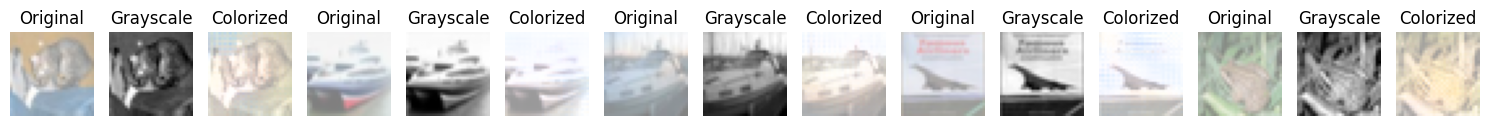

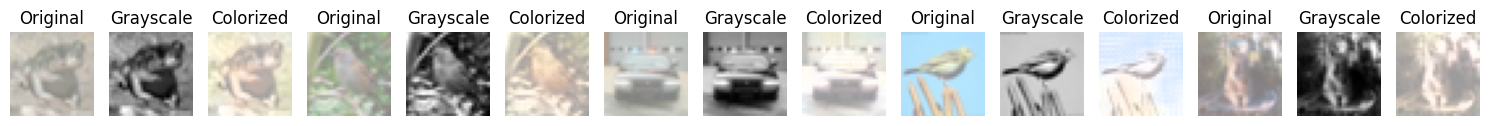

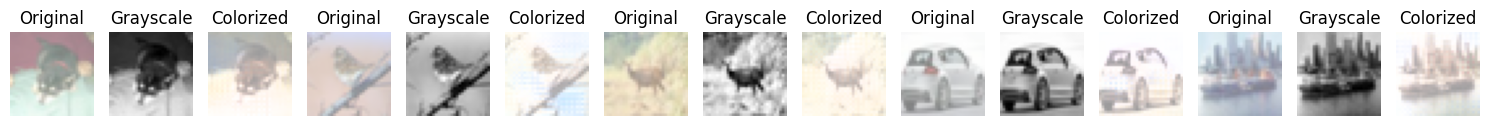

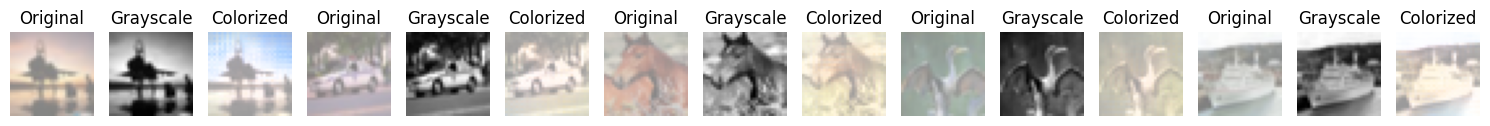

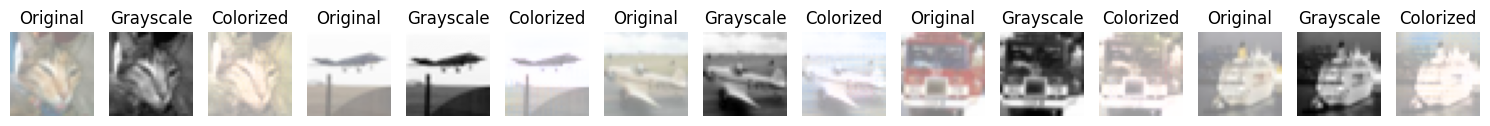

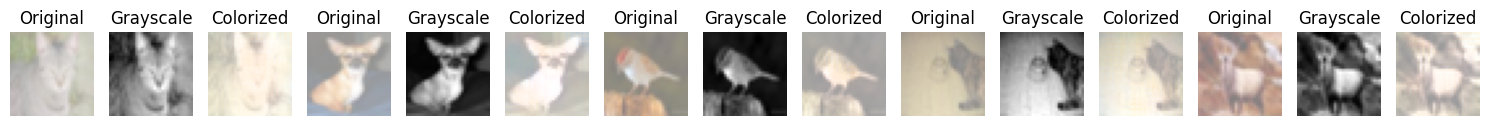

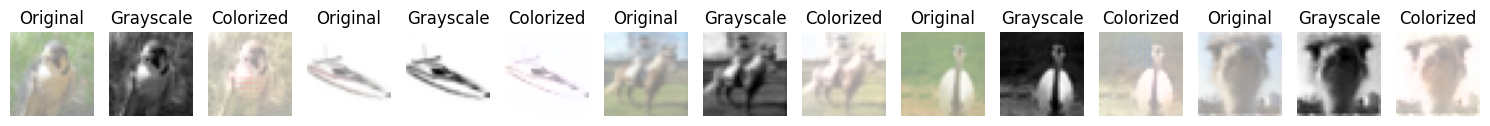

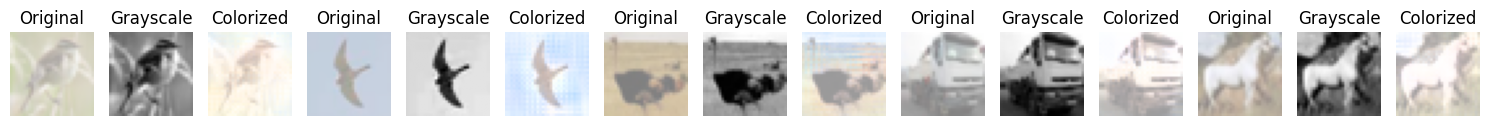

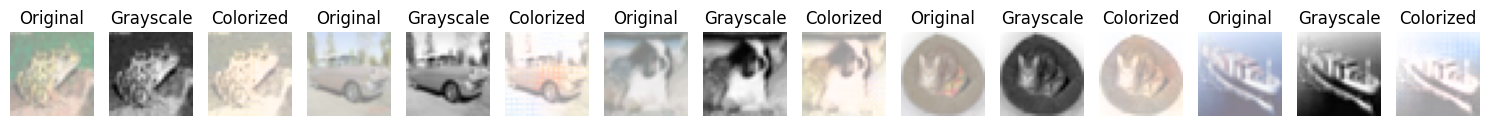

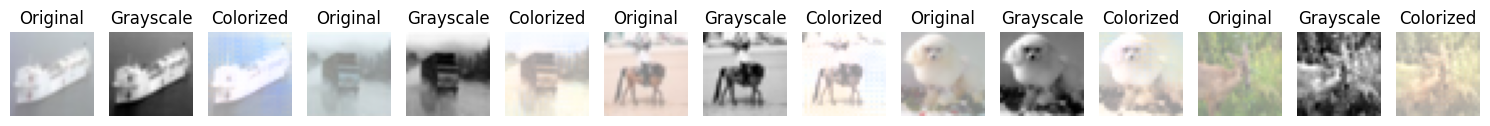

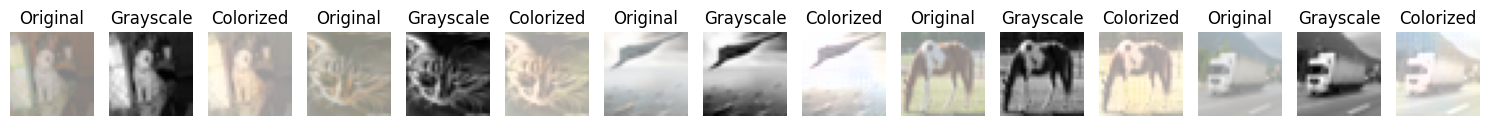

In [ ]:
with torch.no_grad():
    for i, (images, _) in enumerate(test_loader):

        images = images.to(device)

        # Convert RGB → Grayscale
        grayscale_images = rgb_to_gray(images).to(device)

        # Model prediction
        colorized_images = Model(grayscale_images)

        # Move tensors to CPU for visualization
        grayscale_images_cpu = grayscale_images.cpu().squeeze(1)  # remove channel dim
        colorized_images_cpu = colorized_images.cpu()
        original_images_cpu = images.cpu()

        # Exaggerate colors
        colorized_images_cpu = exaggerate_colors(colorized_images_cpu)

        # Visualize
        visualize_all_three(
            original_images_cpu,
            grayscale_images_cpu,
            colorized_images_cpu
        )

        # Stop after 10 batches
        if i == 10:
            break

In [ ]:
import os
# Get the current working directory
current_directory = os.getcwd()
# Print the current working directory
print("Current working directory:", current_directory)

Current working directory: /content


In [ ]:
# Import library
from google.colab import files

# Upload files from local system
uploaded = files.upload()

# Print uploaded file names
for filename in uploaded.keys():
    print("Uploaded file:", filename)

# Optional: Access file content
for filename in uploaded.keys():
    with open(filename, 'rb') as f:
        data = f.read()
        print(f"{filename} size:", len(data), "bytes")


Saving WhatsApp Image 2026-02-16 at 8.57.04 PM (2).jpeg to WhatsApp Image 2026-02-16 at 8.57.04 PM (2).jpeg
Uploaded file: WhatsApp Image 2026-02-16 at 8.57.04 PM (2).jpeg
WhatsApp Image 2026-02-16 at 8.57.04 PM (2).jpeg size: 143964 bytes


In [ ]:
import os
# List all files in the current directory
files = os.listdir("/content")
print("Files in the current directory:", files)

Files in the current directory: ['.config', 'data', 'WhatsApp Image 2026-02-16 at 8.57.04 PM (2).jpeg', 'sample_data']


In [ ]:
import torchvision.transforms as transforms

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),

    # If you need to normalize, uncomment the following line
    # transforms.Normalize(mean=[0.5], std=[0.5])  # Assuming you want to normalize to [-1, 1] range
])

In [ ]:
# Apply the transformations
img_tensor = transform(gray_img).unsqueeze(0)  # Add a batch dimension

# Ensure the model is in evaluation mode
Model.eval()

# Move the image tensor to the device where your model is (likely 'cuda' if using GPU)
img_tensor = img_tensor.to(device)

# Get the model's output
with torch.no_grad():
    colorized_tensor = Model(img_tensor)

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gray_img = Image.open("WhatsApp Image 2026-02-16 at 8.57.04 PM (2).jpeg").convert("L")
transform = transforms.Compose([
    transforms.ToTensor()
])
img_tensor = transform(gray_img).unsqueeze(0)  # add batch dimension
img_tensor = img_tensor.to(device)

Model.eval()
model = Model.to(device)
with torch.no_grad():
    colorized_tensor = model(img_tensor)
    colorized_img = transforms.ToPILImage()(
    colorized_tensor.squeeze(0).cpu()
)
    colorized_img.save("colorized2.jpg")

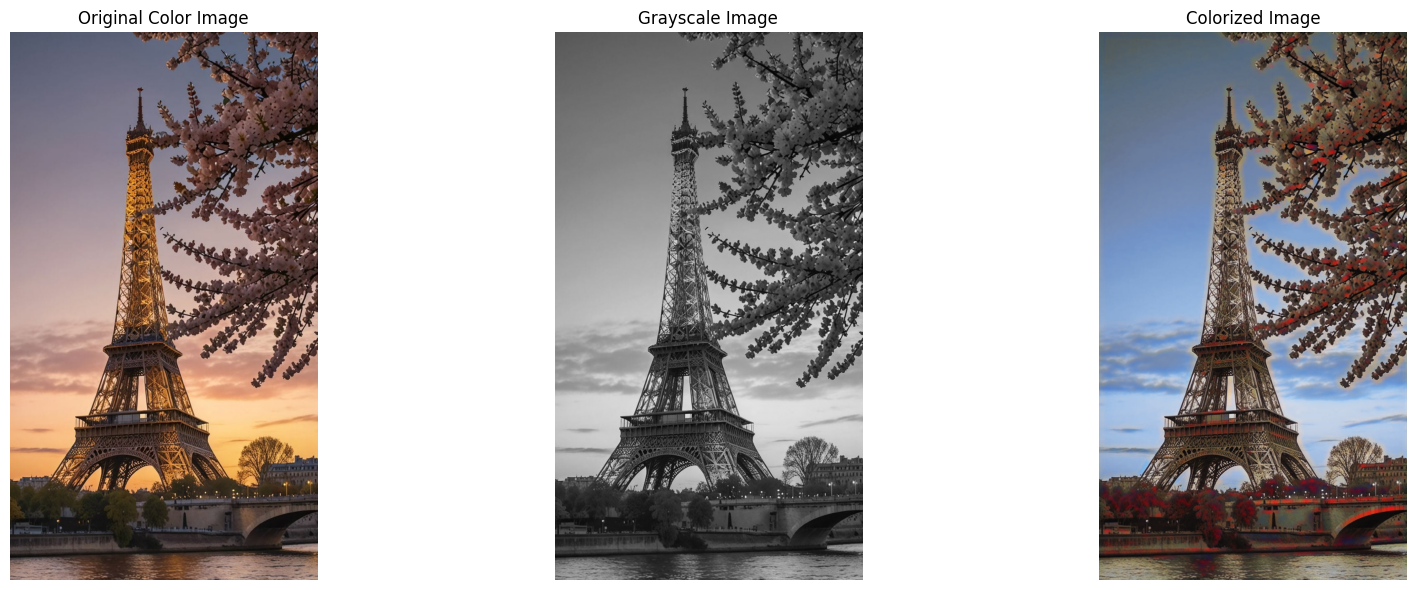

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the original color image
img = Image.open("WhatsApp Image 2026-02-16 at 8.57.04 PM (2).jpeg").convert("RGB")

# Plotting the original, grayscale, and colorized images side-by-side
fig, ax = plt.subplots(1, 3, figsize=(18, 6)) # Create a figure with 1 row and 3 columns

# Display original color image
ax[0].imshow(img)
ax[0].set_title("Original Color Image")
ax[0].axis('off') # Hide axes

# Display grayscale image
ax[1].imshow(gray_img, cmap='gray') # Since it's grayscale, use cmap='gray'
ax[1].set_title("Grayscale Image")
ax[1].axis('off') # Hide axes

# Display colorized image
ax[2].imshow(colorized_img)
ax[2].set_title("Colorized Image")
ax[2].axis('off') # Hide axes

plt.tight_layout() # Adjust spacing
plt.show()